In [1]:
#In this assignment students will build the random forest model after normalizing the
#variable to house pricing from boston data set.

In [2]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


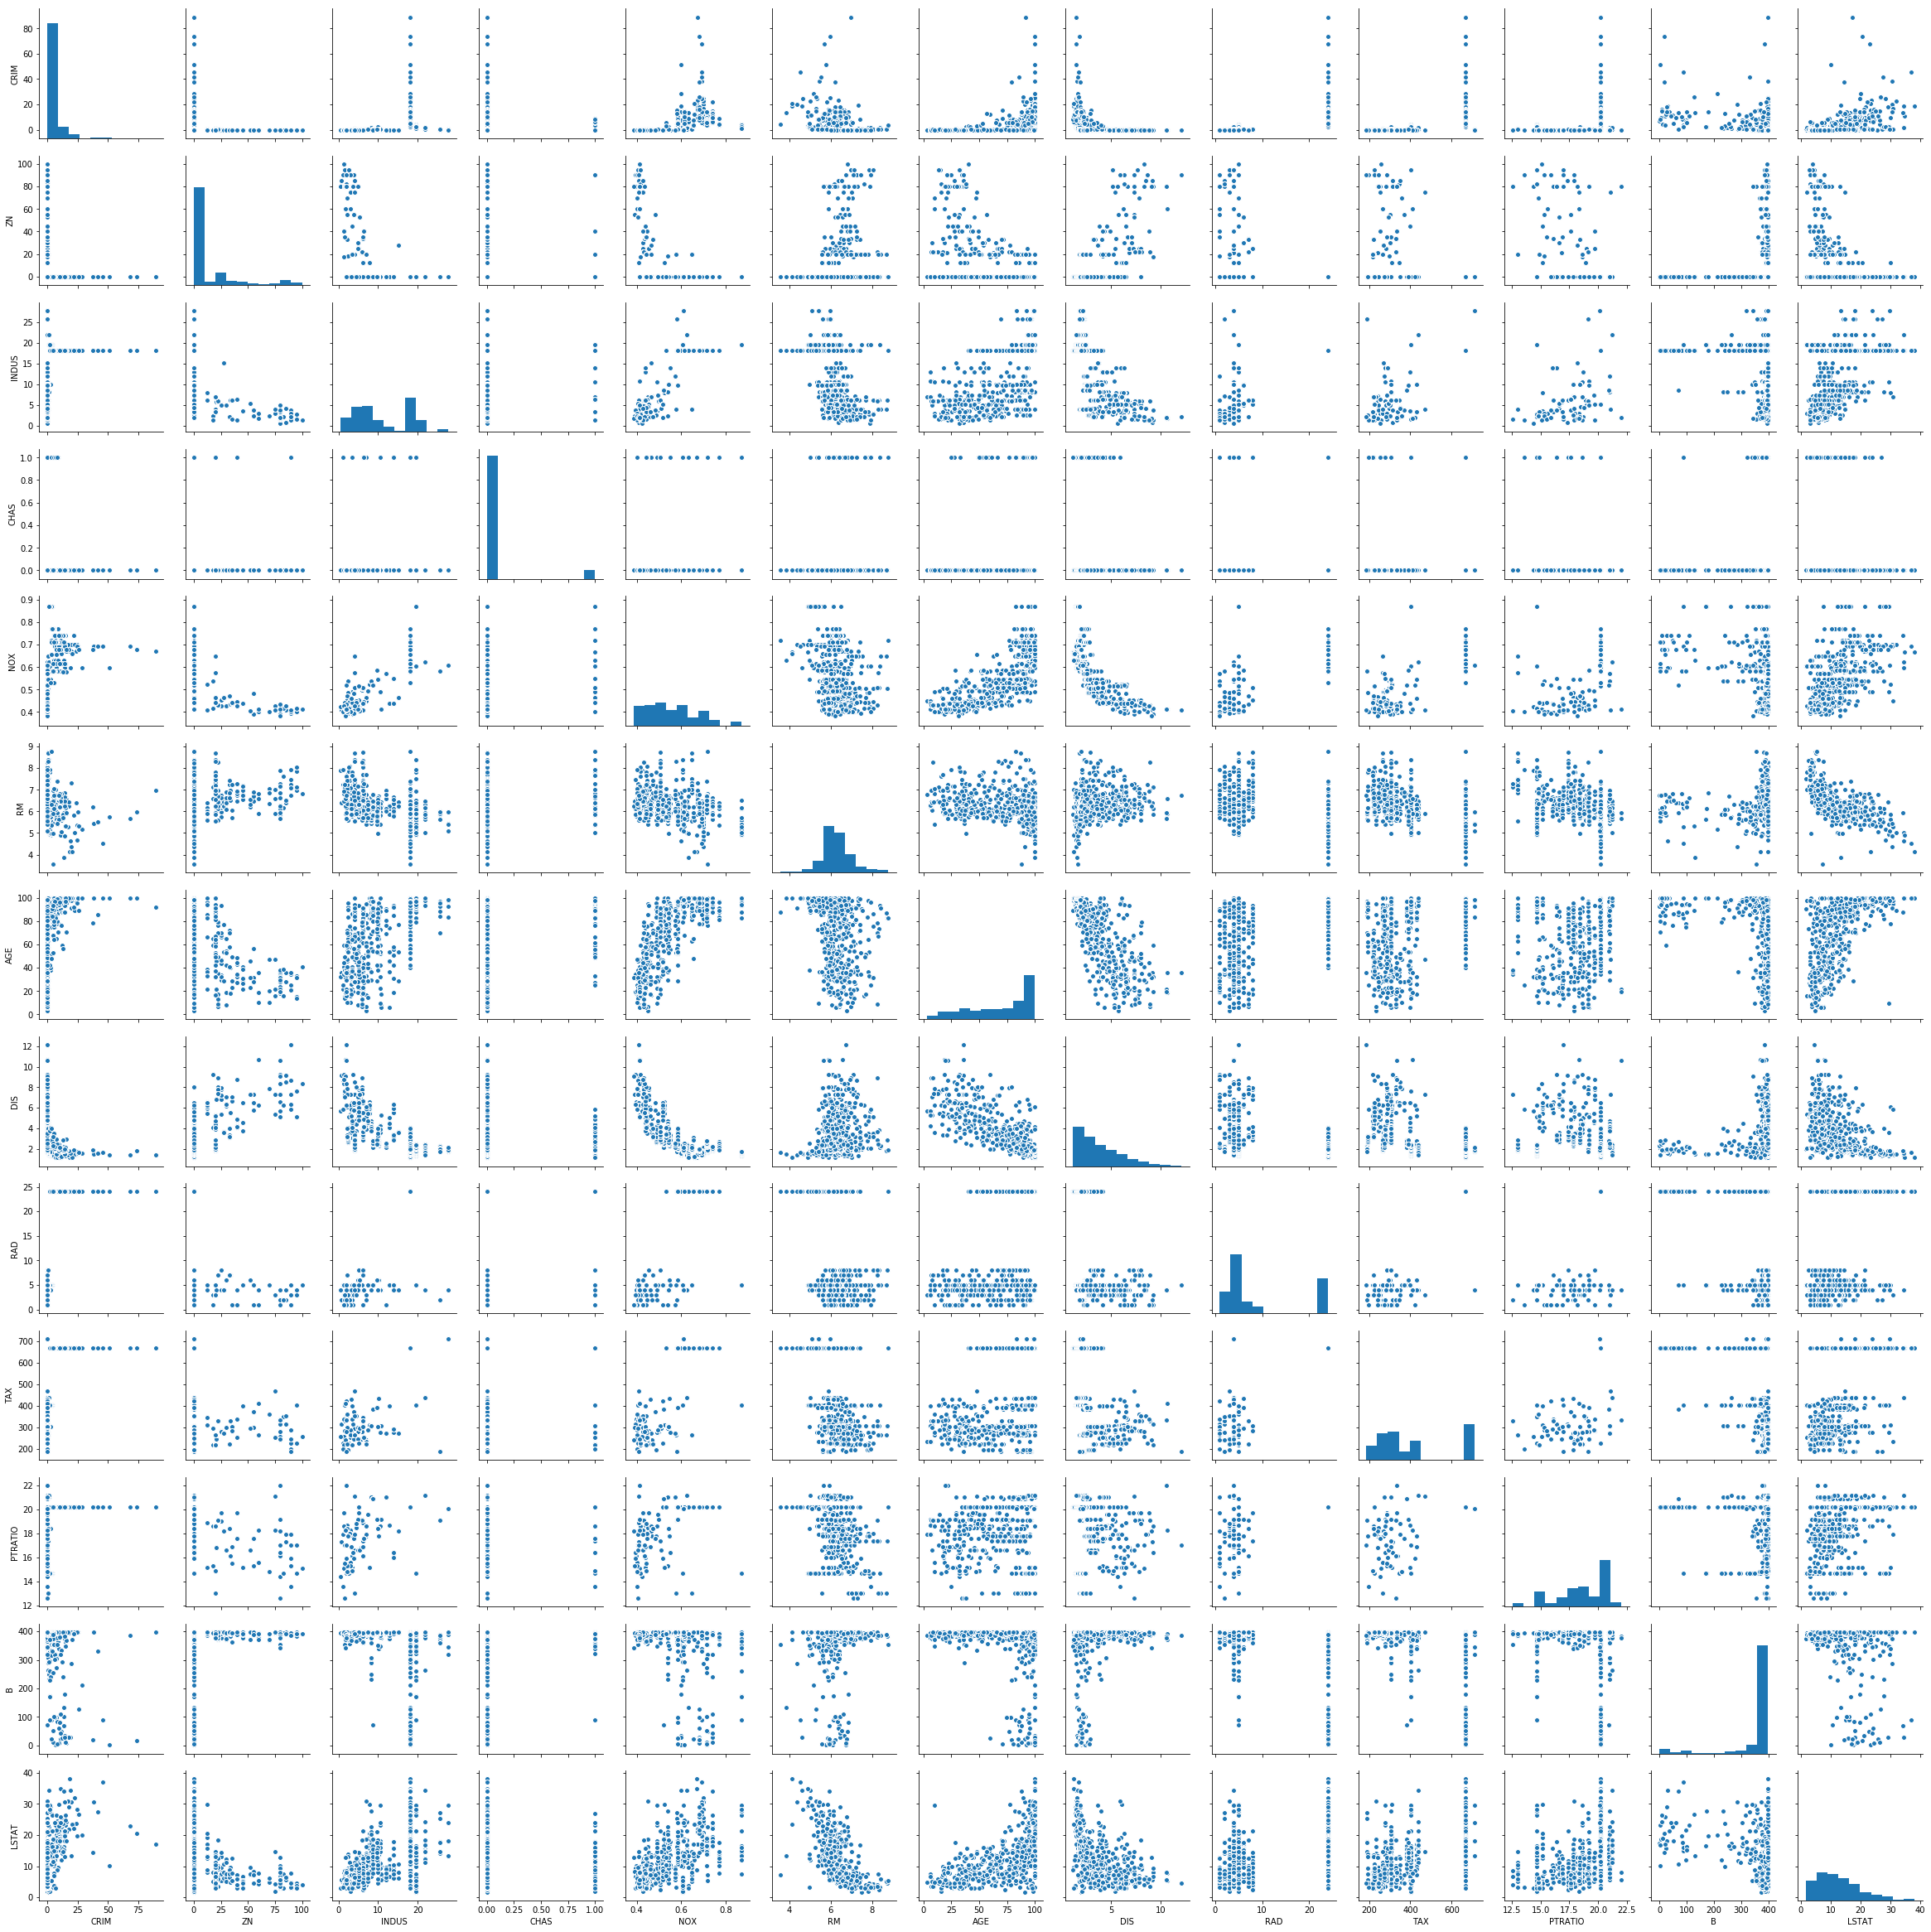

In [5]:
sns.pairplot(features)

In [6]:
scaler = StandardScaler()

In [7]:
#normalizing the variables
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
features_scaled = scaler.transform(features)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.33)

In [10]:
r_reg = RandomForestRegressor()

In [11]:
r_reg.fit(X_train, y_train)

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
# the above model is fit with no. of estimators as 10, now lets's see the accuracy score for such model
r_reg.score(X_train, y_train)

0.9796777232483611

In [13]:
r_reg_pred = r_reg.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices using Random forest (estimators=10): $Y_i$ vs $\\hat{Y}_i$')

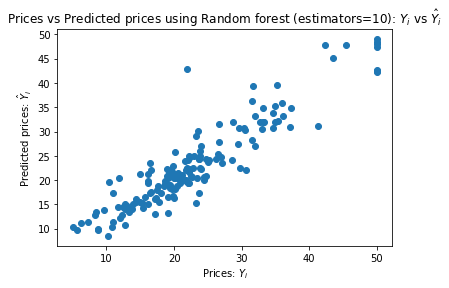

In [14]:
plt.scatter(y_test, r_reg_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices using Random forest (estimators=10): $Y_i$ vs $\hat{Y}_i$")

In [15]:
print('the mean sqaured error is:', mean_squared_error(y_test, r_reg_pred))

the mean sqaured error is: 13.770394011976048


In [16]:
print("the root mean squared error is:", sqrt(mean_squared_error(y_test, r_reg_pred)))

the root mean squared error is: 3.7108481526432806


In [17]:
print('The test variance score is:', r2_score(y_test, r_reg_pred))

The test variance score is: 0.8505543331639466


In [18]:
r_reg.score(X_test, y_test)

0.8505543331639466

In [19]:
#now let us increase the no. of estimators and fit the model
r_reg = RandomForestRegressor(n_estimators=500, max_features=0.8)

In [20]:
r_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
r_reg.score(X_train, y_train)

0.9845541942633762

In [22]:
r_reg_pred = r_reg.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices using Random forest (estimators=500): $Y_i$ vs $\\hat{Y}_i$')

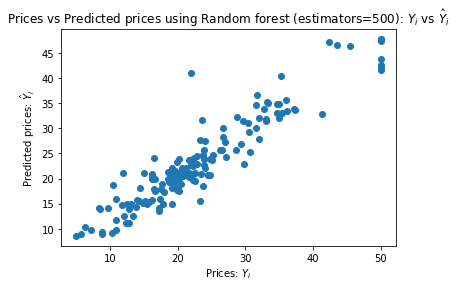

In [23]:
plt.scatter(y_test, r_reg_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices using Random forest (estimators=500): $Y_i$ vs $\hat{Y}_i$")

In [24]:
print('the mean sqaured error is:', mean_squared_error(y_test, r_reg_pred))

the mean sqaured error is: 11.655937318323407


In [25]:
print("the root mean squared error is:", sqrt(mean_squared_error(y_test, r_reg_pred)))

the root mean squared error is: 3.414079278271582


In [26]:
print('The test variance score is:', r2_score(y_test, r_reg_pred))

The test variance score is: 0.8735018530609122


In [27]:
r_reg.score(X_test, y_test)

0.8735018530609122

In [28]:
# let us also build a linear model for comparison
reg = LinearRegression()

In [29]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
reg.score(X_train, y_train)

0.7102728691954343

In [32]:
reg_pred = reg.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices using Linear Regression: $Y_i$ vs $\\hat{Y}_i$')

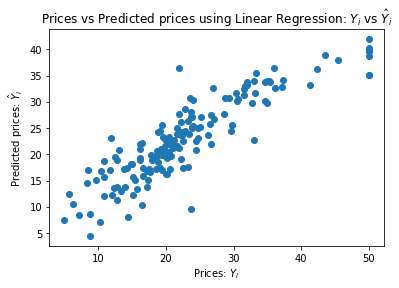

In [33]:
plt.scatter(y_test, reg_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices using Linear Regression: $Y_i$ vs $\hat{Y}_i$")

In [34]:
print('the mean sqaured error is:', mean_squared_error(y_test, reg_pred))

the mean sqaured error is: 20.168048208172706


In [37]:
print('the root mean sqaured error is:', sqrt(mean_squared_error(y_test, reg_pred)))

the root mean sqaured error is: 4.490885013911257


In [38]:
print('The test variance score is:', r2_score(y_test, reg_pred))

The test variance score is: 0.781122645391936
